# Epoch 3 - Solutions


## Imports and utility functions

In [0]:
import numpy as np
import types
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'RdBu'

import sklearn.datasets as datasets
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline



def plot_decision_boundary(model, X, y, degree=1):
    """
    Use this to plot the decision boundary of a trained model.
    """
    grid_lim = np.array([[X[:,0].min(), X[:,0].max()], [X[:,1].min(), X[:,1].max()]])
    xx, yy = np.mgrid[grid_lim[0,0]:grid_lim[0,1]:.01, 
                      grid_lim[1,0]:grid_lim[1,1]:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    t = PolynomialFeatures(degree=degree, include_bias=False)
    _poly = t.fit_transform(grid)
    
    probs = model.predict_proba(_poly)[:, 1].reshape(xx.shape)
    
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y, s=100,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(grid_lim[0,0],grid_lim[0,1]), 
           ylim=(grid_lim[1,0],grid_lim[1,1]),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.gcf().set_size_inches(21, 14)
    return f, ax
  
def plot_decision_boundry_linear(model, X, y):
  def predict_proba(self, X):
    x = np.float64(model.predict(X) > 0.5).reshape(-1, 1)
    x = np.hstack((1-x, x))
    
    return x
  
  model.predict_proba = types.MethodType(predict_proba, model)
  
  plot_decision_boundary(model, X, y)

# Quick Recap


## Linear Regression

![](https://cdn-images-1.medium.com/max/2000/1*lPsG_BLstPpJi6MZekn7-g.png)

Last time we talked about linear regression. 

We found the best line that best fits our points. 

We also found ways to deal with non-linear data by fitting a polynomial (still linear regression - it's linear in coefficients not in features). 

We found that it is a powerful method yet simple method for estimating our target variable, and check for correlations in the data.

## Overfitting

![](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Overfitting.png?x31195)

We also dealt with underfitting and overfitting.

**Reminder**: overfitting is when the test score is very low compared to the training score - i.e. the model "memorizes" the training data and can't generalize to new data.

**Reminder**: underfitting is when the model is not powerful enough to capture the complexity of the data.

We have to find the sweet spot in the middle.

## Model Evaluation

### Train / test split

**Reminder**: the score on the training set tells us nothing of the model's performance. A better estimate of that is by splitting our data into a training set and a test set - training on the training set and evaluating on the test set.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png =400x)

### K-Fold Cross Validation

**Reminder**: K-Fold cross validation is a method with which we split our training data into multiple folds to have an "average" test score (in case we were really unlucky) with the split.

![](https://www.researchgate.net/profile/Juan_Buhagiar2/publication/322509110/figure/fig1/AS:583173118664704@1516050714606/An-example-of-a-10-fold-cross-validation-cro17.png)


# Classification Problems

If in a regression setting we had some features $X$ and some target values $y$, we had to make a model that predicts new $y$'s that are as close as possible to the original $y$'s. In that case, the target variable is **continous**. 

Classification problems are different. 

Let's consider this dataset of two blobs, and try to make some predictions on it.

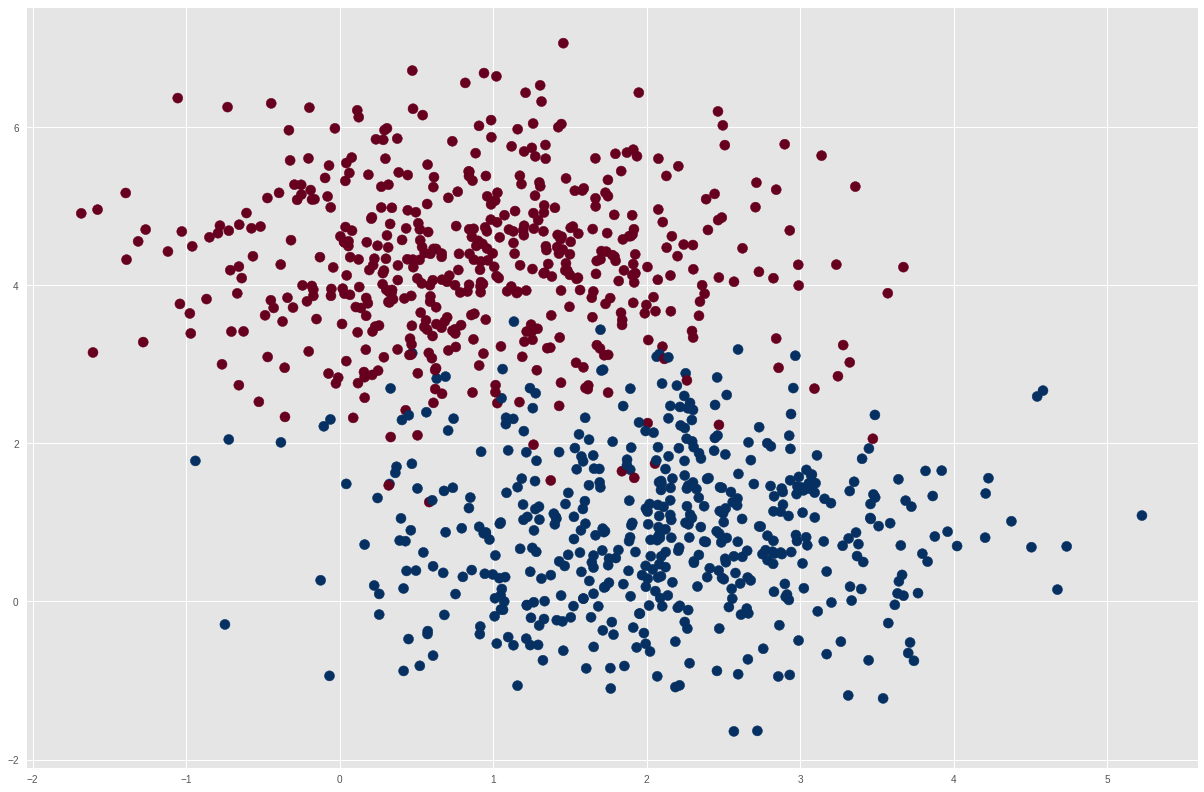

In [0]:
X, y = datasets.make_blobs(1000, centers=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

How about we use LinearRegression to classify our data. This time, our data has 2 features:

$X = \begin{bmatrix}
x_1^{(1)} & x_1^{(2)} \\
x_2^{(1)} & x_2^{(2)} \\
x_3^{(1)} & x_3^{(2)} \\
\vdots & \vdots \\
x_n^{(1)} & x_n^{(2)}\\
\end{bmatrix}$

And the target variable $y$ has only two values: ${\{0, 1}\}$. This time we fit a *hyper-plane* through our datapoints,  will represent it using colors.

After we fitted our model, to get the classes of our points we could just say that if a point has a prediction less than $0.5$ we consider it to be of class 0, and if a point has a prediction of over $0.5$ then we consider it belonging to class 1. You can see that in the *plot_decision_boundry_linear()* function at the top of the page.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


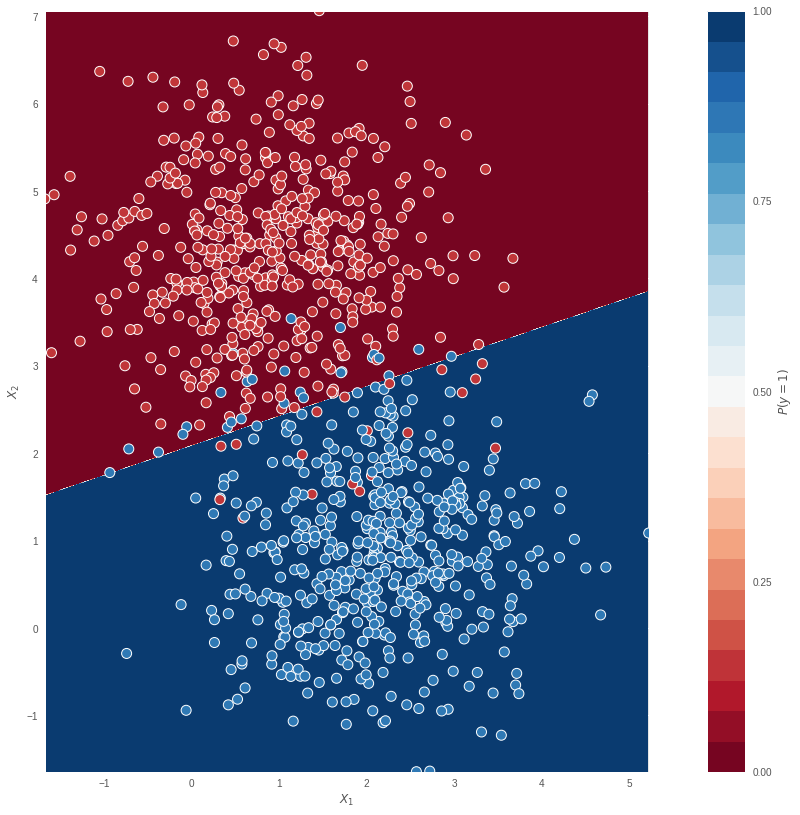

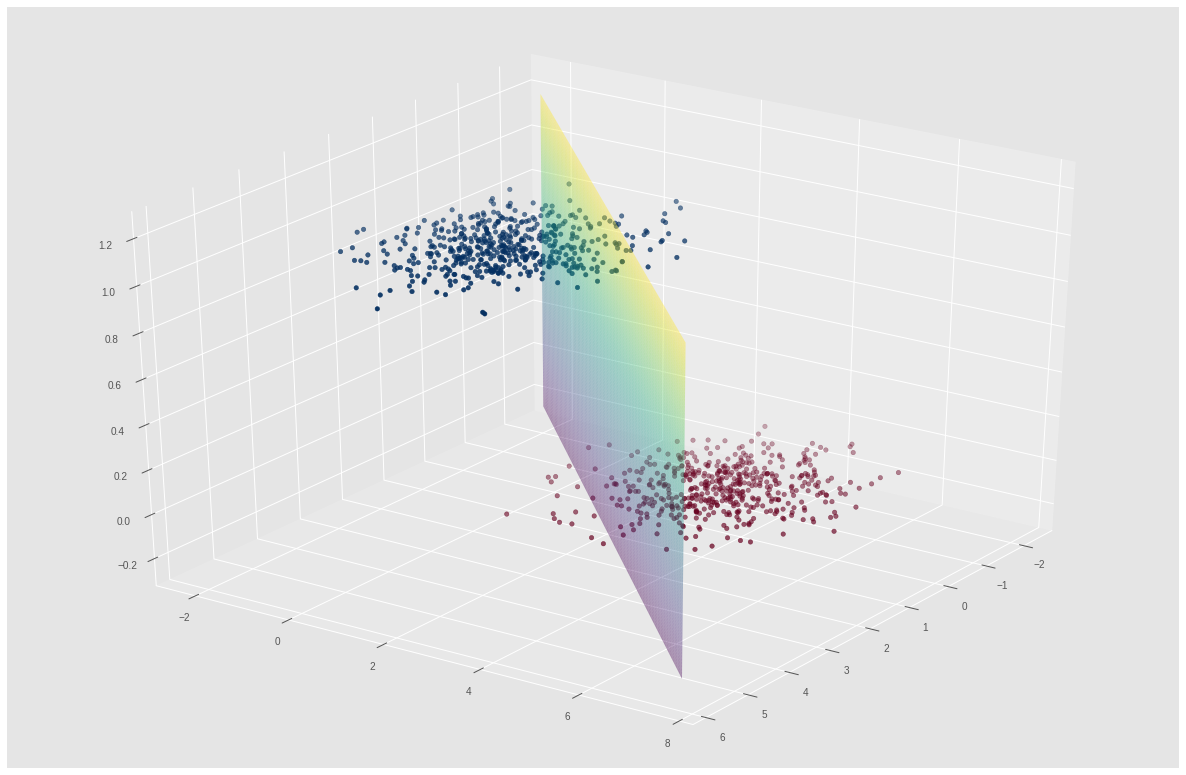

In [0]:
from sklearn.linear_model import LinearRegression


# Training LinearRegression model
model = LinearRegression()
model.fit(X, y)

# Plotting the decision boundry
plot_decision_boundry_linear(model, X, y)

# 3d plot of the hyper-plane
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, 'o', c=y)
ax.view_init(30, 35)
ax.hold(True)


_x = np.linspace(np.min(X[:, 0]-0.5), np.max(X[:, 0]) + 0.5, 100).reshape(-1, 1)
_y = np.linspace(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, 100).reshape(-1, 1)
_X = np.hstack((_x, _y))
_z = model.predict(_X).reshape(1, -1)

ax.plot_surface(_x, _y, _z, alpha=0.4, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.gcf().set_size_inches(21, 14)
plt.show()


## Question

Looks preety correct. But why did we choose 0.5 as our threshold? Why not 0.8? or 0.3?

# Logistic Regression

You could say that we chose 0.5 because it reflects a probability. But in fact that is arbitrary, and our regression model is not in any way related to probabilities. A modification of the LinearRegression model is **LogisticRegression**.

Logistic Regression builds upon the **sigmoid** function.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/2000px-Sigmoid-function-2.svg.png)
The sigmoid is a function that can **be interpreted as a cumulative probability distribution**.

It's just a linear model with the **sigmoid** on top of it.

![](https://www.saedsayad.com/images/LogReg_1.png)


**Note:** This time we are not interested in minimizing the **least squares**, but rather the **categorical cross entropy**.  It's a special function designed for classifications. You can read more about it below.

Categorical cross entropy:
- https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/

Further reading:
- https://www.saedsayad.com/logistic_regression.htm
- https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
- https://en.wikipedia.org/wiki/Sigmoid_function

Let's try to train LogisticRegression on our dataset.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(<matplotlib.figure.Figure at 0x7f38dfdb0f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38dd553550>)

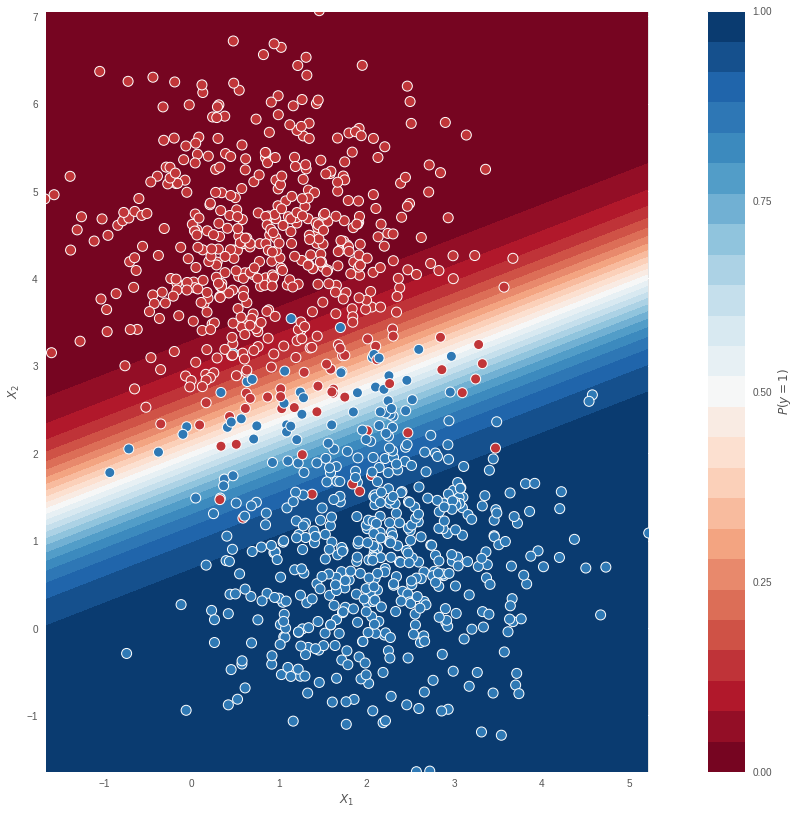

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Training the model on the data.
model.fit(X, y)

# Use this function to plot the decision boundry of your model.
plot_decision_boundary(model, X, y)

We can actually see the sigmoid that is applied to the linear model. It goes from probability 0 to probability 1. The plot shows the probability that a point is red. What is the accuracy of our model?

In [0]:
model.score(X, y)

0.954

## What did I do wrong?

The accuracy reported is on the training data. Which tells us **nothing** about or model. 

# Coding Challenge
Fix the above code such that we can calculate the test accuracy.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(x_train, y_train)

print('Train accuracy', model.score(x_train, y_train))
print('Test accuracy', model.score(x_test, y_test))

Train accuracy 0.9506666666666667
Test accuracy 0.964


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


![](https://memegenerator.net/img/instances/74867847/then-he-separated-the-light-from-the-darkness-the-first-logistic-regression-model.jpg)

## Linear Separability

Let's try to get fancy, and try to fit logistic regression on the moons dataset.

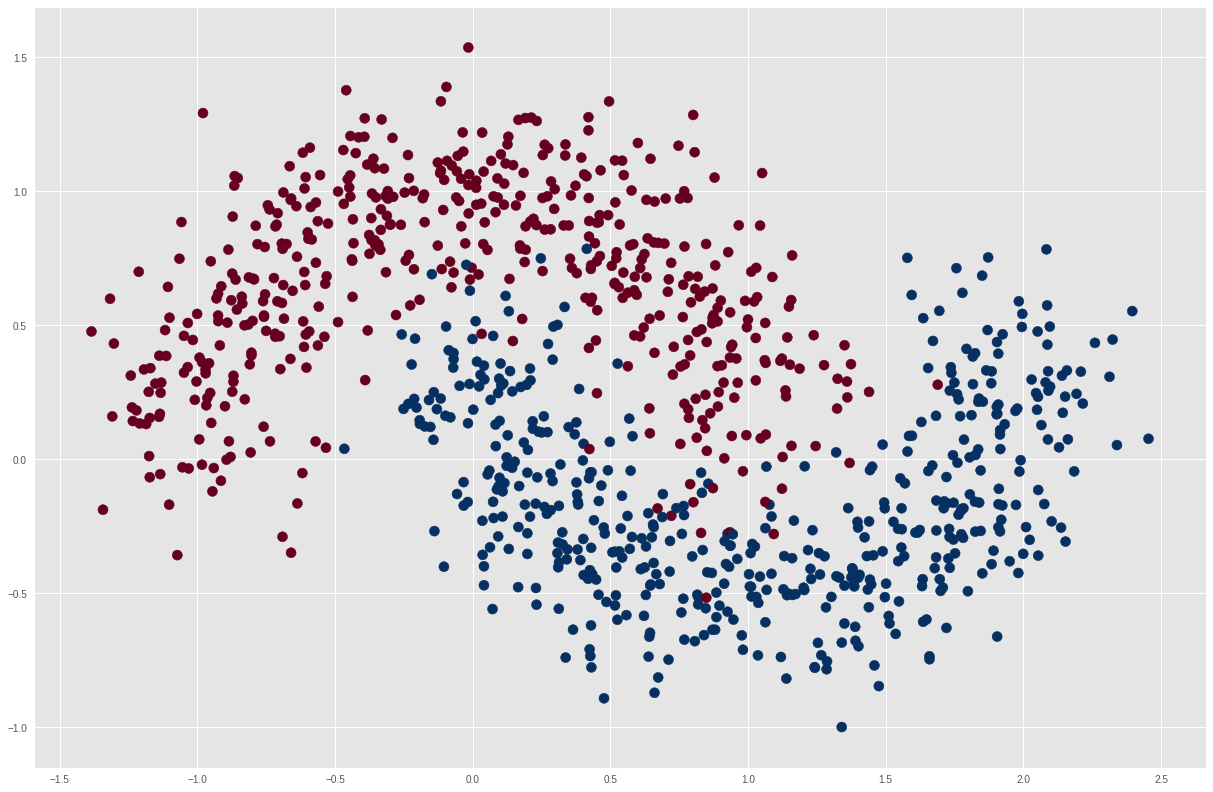

In [0]:
X, y = datasets.make_moons(1000, noise=0.2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

In [0]:
# Same thing as before, splitting the data and training.

x_train, x_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(x_train, y_train)

print("Accuracy", model.score(x_test, y_test))

Accuracy 0.836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


~85% accuracy. That's actually not bad. Let's plot the decision boundry.

(<matplotlib.figure.Figure at 0x7f38dade0240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db48abe0>)

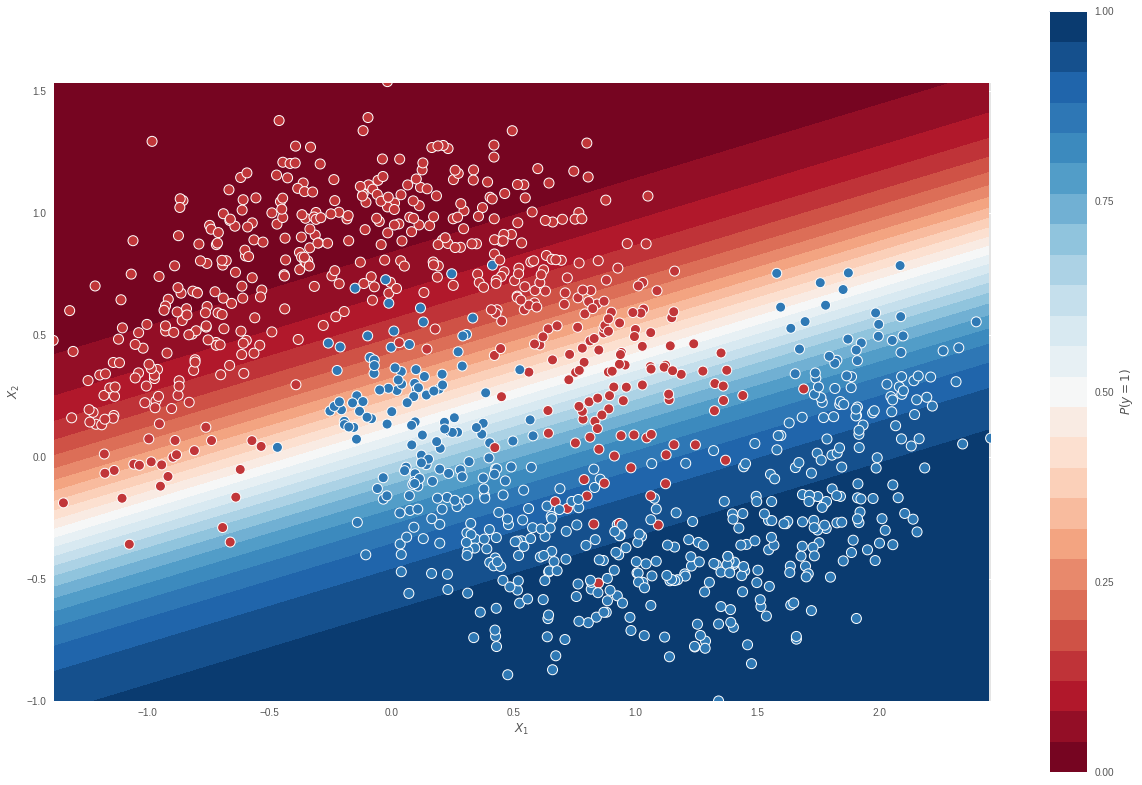

In [0]:
plot_decision_boundary(model, X, y)

In fact, logistic regression does a poor job at classifying these points, because they are not **Lineary Separable**. That just means that there's no straight line that can separate the points. 


Further Reading:

- https://en.wikipedia.org/wiki/Linear_separability

## Polynomial Features

Since logistic regression is a **linear model**, we could try to apply PolynomialFeatures to it, as before. 

The graph below looks really close to the decision boundry for our data. It's a polynomial of degree 3.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Polynomialdeg3.svg/1200px-Polynomialdeg3.svg.png)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 0.924


(<matplotlib.figure.Figure at 0x7f38dba06ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38da7c2eb8>)

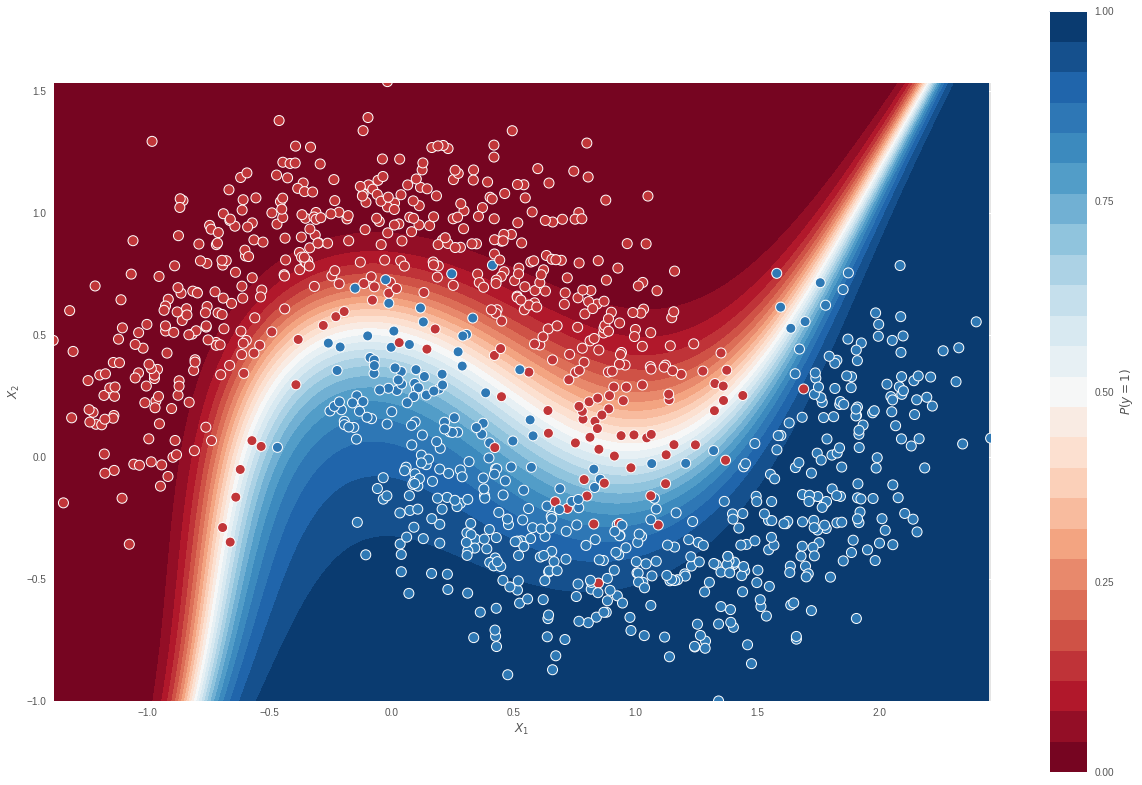

In [0]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 3, because that looks the most appropriate
t = PolynomialFeatures(degree=3, include_bias=False)
X_poly = t.fit_transform(X)

# train / test split, as before; we want to be rigorous.
x_train, x_test, y_train, y_test = train_test_split(X_poly, y)

model = LogisticRegression()
model.fit(x_train, y_train)

print("Accuracy", model.score(x_test, y_test))

plot_decision_boundary(model, X, y, degree=3)

Accuracy ~96%. A much better improvement. 

## Homework
Of course, we could try some higher degrees with some regularization (LogisticRegression has the parameter **C** to control the power of regularization), as before, but **it's left as an exercise to the reader**

Check out the documentation on LogisticRegression:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


Looks preety cool. Let's try something else.

# K-Nearest Neighbors

KNN algorithm is one of the simpler ones. It dosen't actually learn anything. It just memorizes all the points, and when you come up with new points, it calculates the closest points to it. The points then vote to get the class.

**K refers to the number of neighbors**

For example, in 3-NN, if a point is closer to 2 points belonging to class A, and a point belonging to class B, then the predicted class will be A. Check out these pictures for more intuition.


![](https://image.slidesharecdn.com/machine-learning-and-data-mining-13-nearest-neighbor-and-bayesian-classifiers-2990/95/machine-learning-and-data-mining-13-nearest-neighbor-and-bayesian-classifiers-12-728.jpg?cb=1176615304)


KNN documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Further Reading
- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

Let's get back at the blobs.

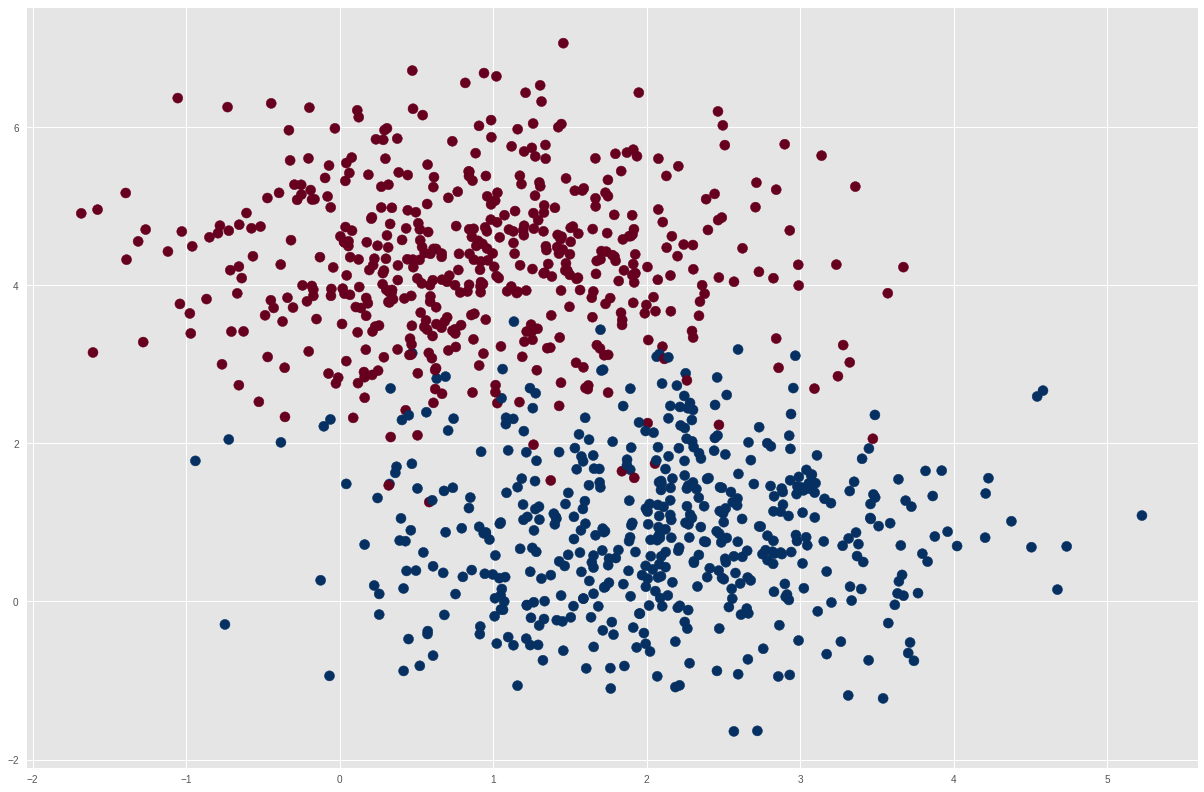

In [0]:
X, y = datasets.make_blobs(1000, centers=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

Train accuracy 1.0
Test accuracy score: 0.936


(<matplotlib.figure.Figure at 0x7f38dfdb07b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38dbad7748>)

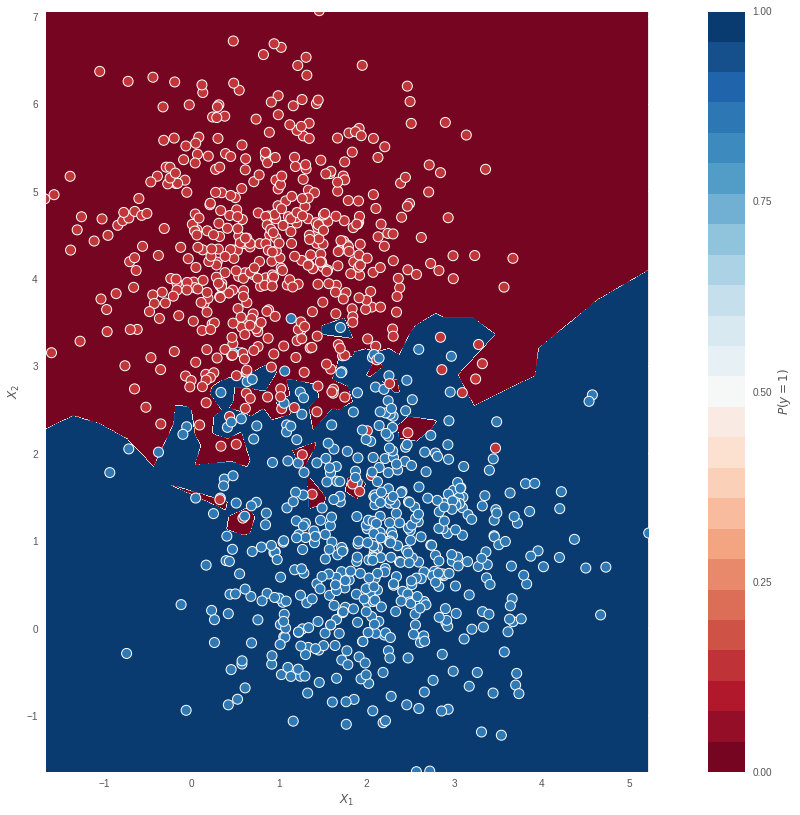

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# 1 neighbor. Maybe arbitrary choice?
knn = KNeighborsClassifier(n_neighbors=1)

x_train, x_test, y_train, y_test = train_test_split(X, y)

knn.fit(x_train, y_train)

print("Train accuracy", knn.score(x_train, y_train))
print("Test accuracy score:", knn.score(x_test, y_test))

plot_decision_boundary(knn, X, y)

![](https://scontent-frx5-1.cdninstagram.com/vp/5109f2bc581a68a0cf02dc7915ebcb60/5C479018/t51.2885-15/e35/40696869_395054887980371_6165376665352514362_n.jpg?se=7&ig_cache_key=MTg2MzI2NjE0MDM3NDIyNjIxMA%3D%3D.2)


We got ~ 94% accuracy for 1-NN. But what about the choice of K? Your turn

## Coding Challenge

Find the best k for KNN, based on the test score.

In [0]:
# TODO split your data into train / test

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0) # random state for reproducibility


# put the test scores in this list
scores = []
ks = []

for k in range(1, 50):
  # TODO train your model with the current k

  model = KNeighborsClassifier(k)
  model.fit(x_train, y_train)
  
  # TODO Check the test accuracy of your model
  score = model.score(x_test, y_test)
  
  # TODO add the score to the list
  
  scores.append(score)
  ks.append(k)
  

Let's plot the scores for each K, and see how we did.

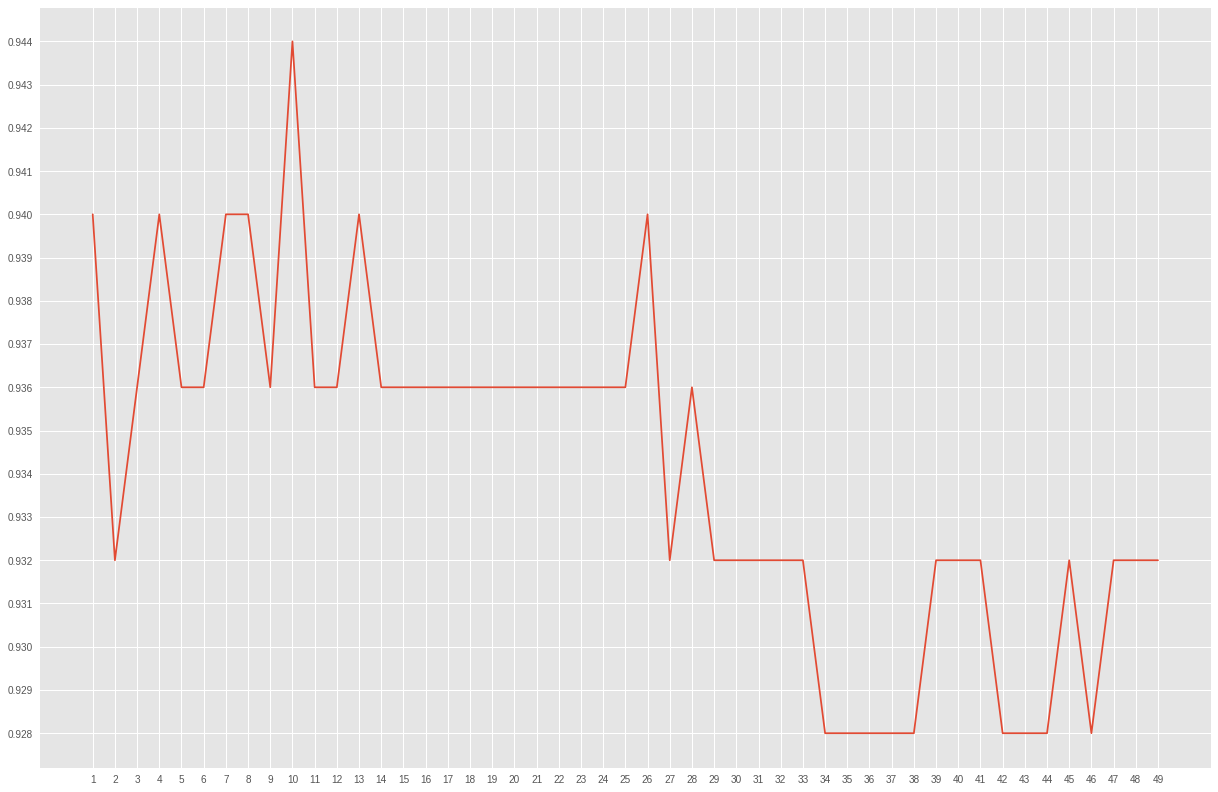

In [0]:
plt.plot(range(1, len(scores) + 1), scores)
plt.gca().set_xticks(np.arange(1, len(scores) + 1))
plt.gca().set_yticks(np.arange(np.min(scores), np.max(scores) + 0.001, 0.001))
plt.gcf().set_size_inches(21, 14)

Let's plot the decision boundry.

(<matplotlib.figure.Figure at 0x7f38db8e33c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db84a9e8>)

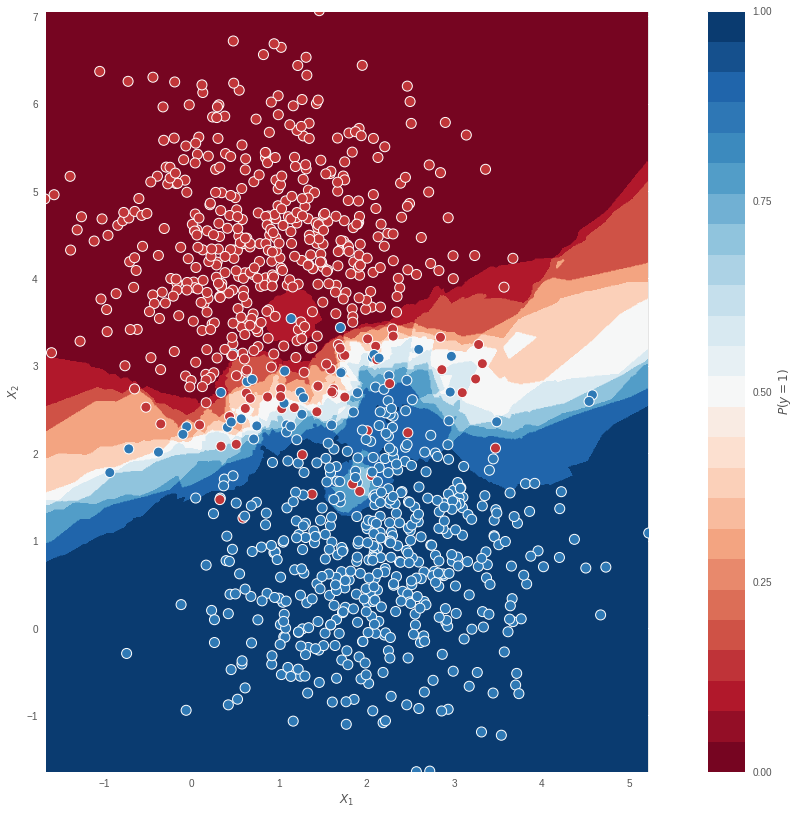

In [0]:
best_k = ks[np.argmax(scores)]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)


plot_decision_boundary(knn, X, y)

## Coding Challenge

Train KNN classifier on the moons dataset. Find your best K by iterating over a range of values and finding the K that maximizez the test error.

(<matplotlib.figure.Figure at 0x7f38db0738d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db57e4e0>)

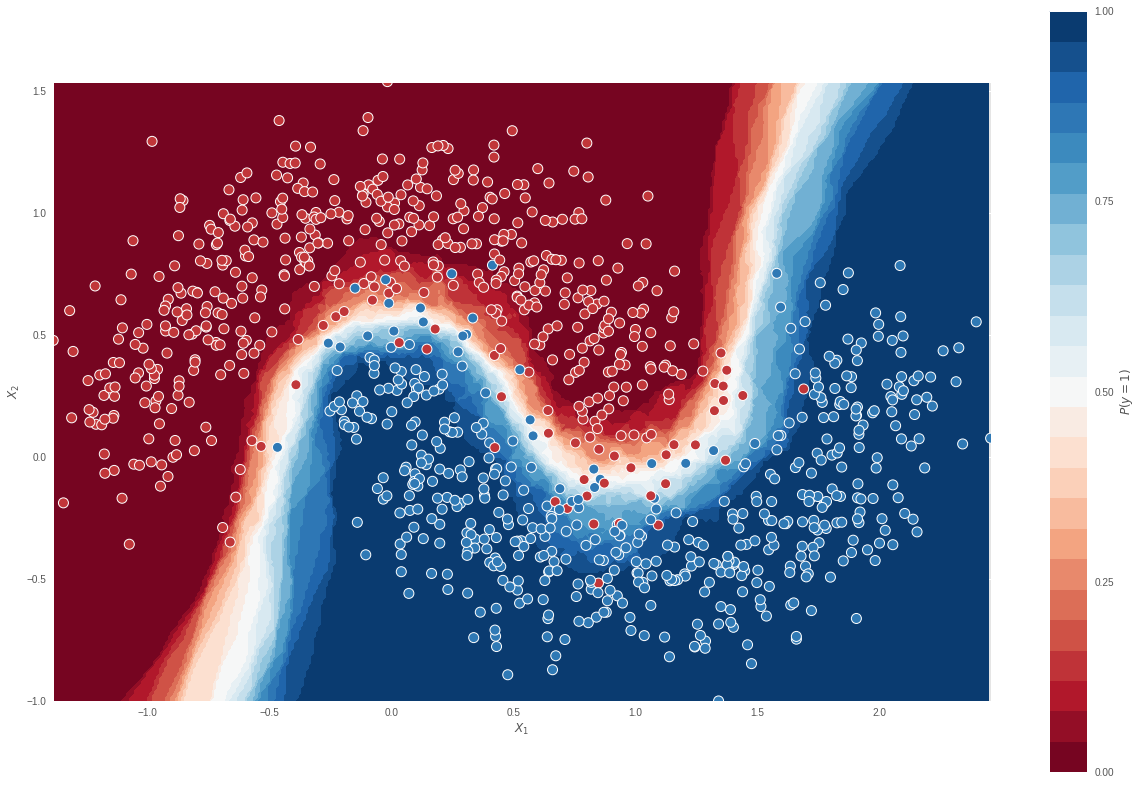

In [0]:
# TODO find the best K and plot the decision boundry on this dataset.
X, y = datasets.make_moons(1000, noise=0.2, random_state=0)


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0) # random state for reproducibility


# put the test scores in this list
scores = []
ks = []

for k in range(1, 50):
  # TODO train your model with the current k

  model = KNeighborsClassifier(k)
  model.fit(x_train, y_train)

  # TODO Check the test accuracy of your model
  score = model.score(x_test, y_test)

  # TODO add the score to the list

  scores.append(score)
  ks.append(k)
 
best_k = ks[np.argmax(scores)]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)


plot_decision_boundary(knn, X, y)

# Decision Trees and Random Forest

A decision tree is just a glorified set of **if** statements. But the catch is that they are **learned** by observing data.
 
![](https://s3-ap-southeast-1.amazonaws.com/he-public-data/Fig%201-18e1a01b.png)

The problem when learning decision trees figuring out what attributes contain the **most** information. That is achieved by maximizing the information gain on each attribute. Check out the further reading for more information.


**Random forest** is a method of combining multiple smaller decision trees for a more robust and accuracte predictions - it's a type of ensemble.

![](https://cdn-images-1.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

Further Reading:
- https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
- https://www.saedsayad.com/decision_tree.htm
- https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
# Third party libraries needed for visualisations
!pip install graphviz
!apt install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


Let's see how a decision tree looks like after we've trained it on the blobs.

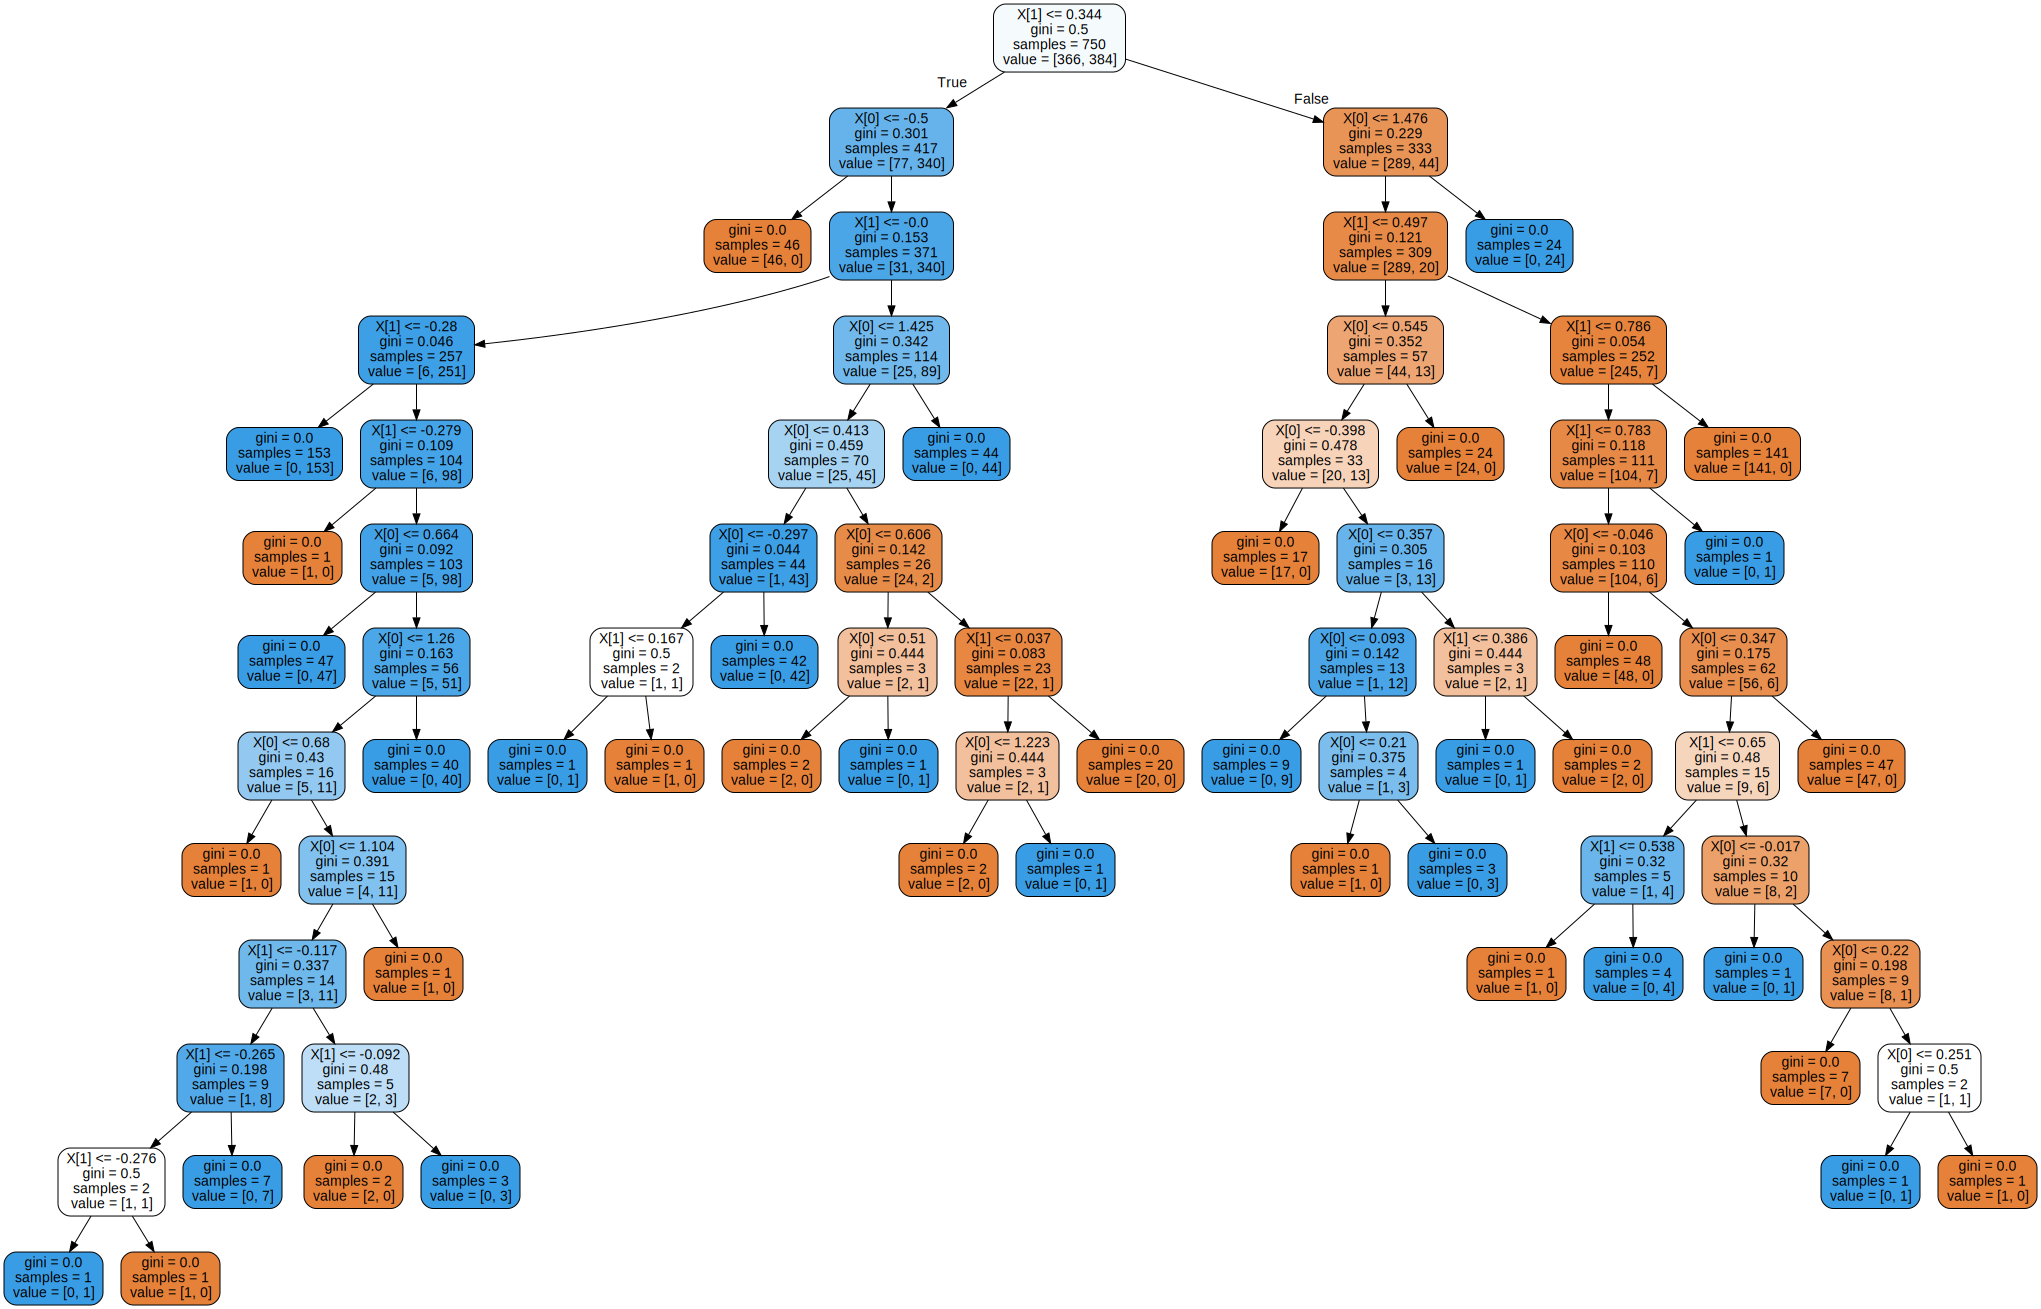

In [0]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


x_train, x_test, y_train, y_test = train_test_split(X, y)


model = DecisionTreeClassifier()
model.fit(x_train, y_train)

dot_data = export_graphviz(model,
                           out_file=None,
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot_data)
graph

Training accuracy 1.0
Test accuracy 0.92


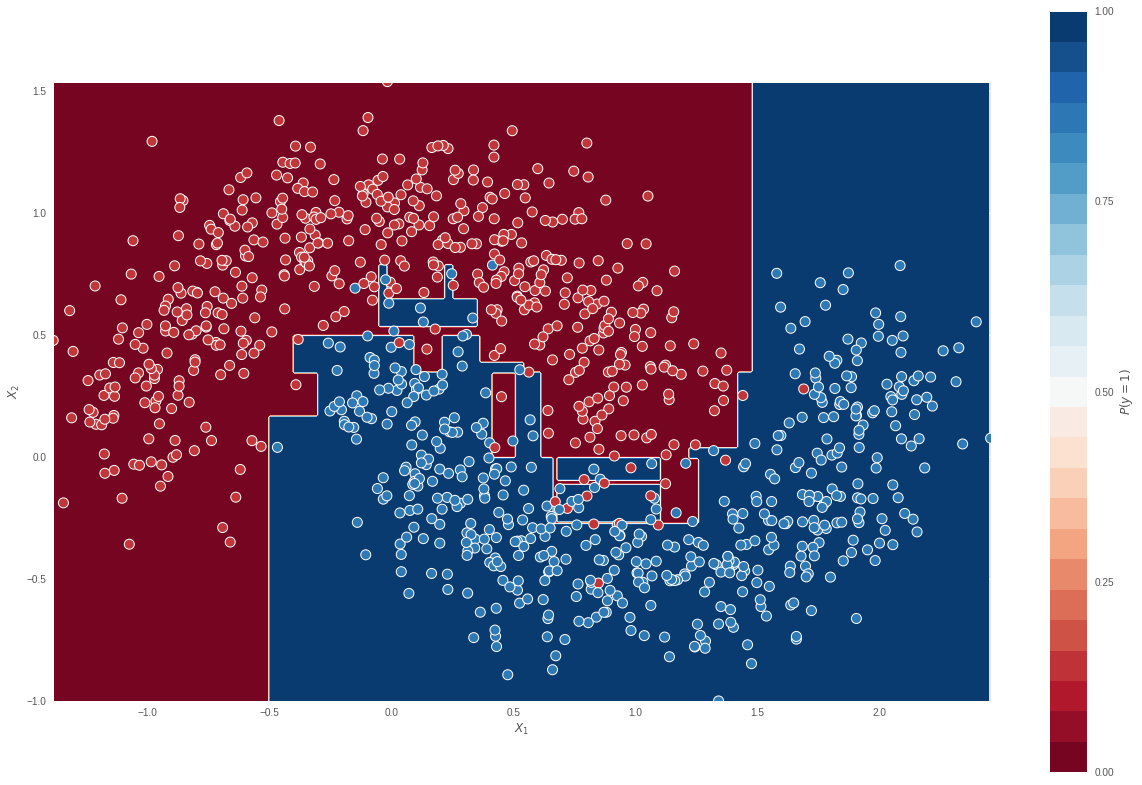

In [0]:
plot_decision_boundary(model, X, y)

print("Training accuracy", model.score(x_train, y_train))
print("Test accuracy", model.score(x_test, y_test))

## Coding Challenge

Remember that RandomForest combines multiple smaller trees to form a better estimator. Try out some values for n_estimators. 

(<matplotlib.figure.Figure at 0x7f38db84f7b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db2210b8>)

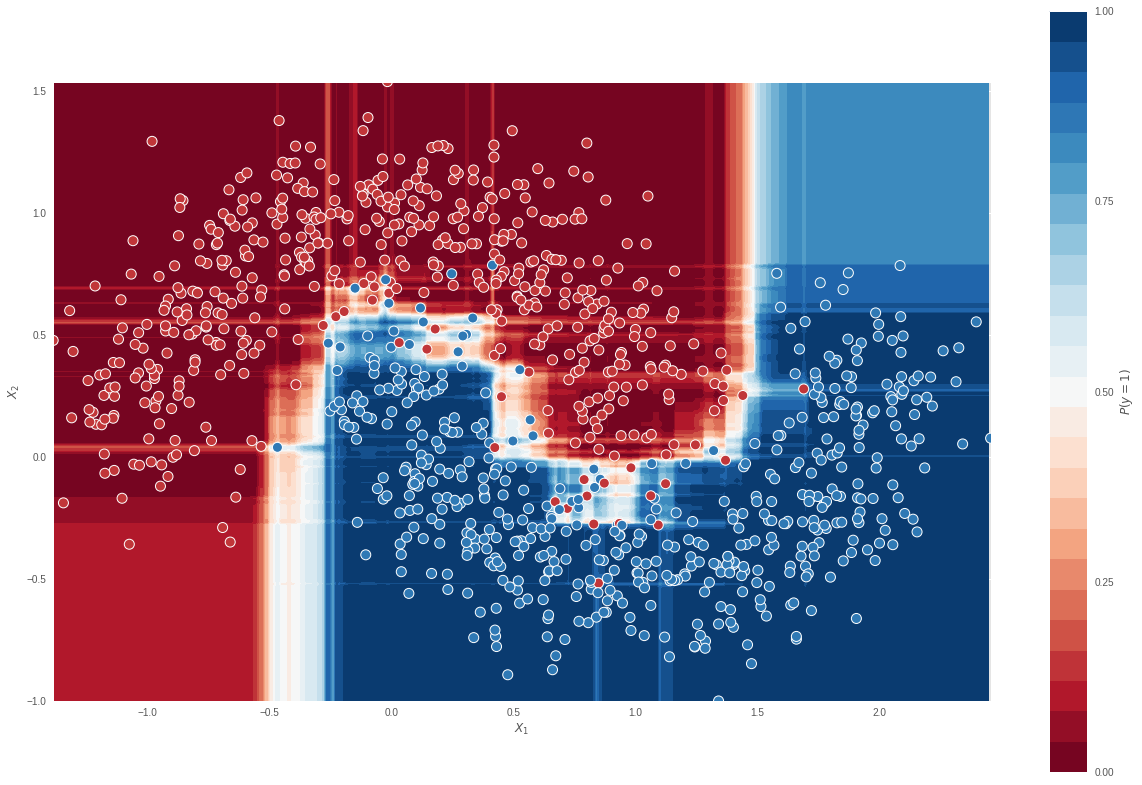

In [0]:
from sklearn.ensemble import RandomForestClassifier


# TODO find the optimal number of estimators in a RandomForest such that it maximizes the test accuracy (dosen't overfit).

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0) # random state for reproducibility

# put the test scores in this list
scores = []
estimators = []

for estimator in range(1, 100):
  # TODO train your model with the current k

  model = RandomForestClassifier(n_estimators=estimator)
  model.fit(x_train, y_train)

  # TODO Check the test accuracy of your model
  score = model.score(x_test, y_test)

  # TODO add the score to the list

  scores.append(score)
  estimators.append(k)
 
best_estimator = estimators[np.argmax(scores)]

model = RandomForestClassifier(n_estimators=best_estimator)
model.fit(x_train, y_train)

# TODO plot the decision boundry

plot_decision_boundary(model, X, y)


# Support Vector Machines

Support vector machines are one of the most powerful machine learning models. Since its invention in the '80s, it outperformed almost all types of models, until it was surpassed by neural networks in the 2000s.

It works by finding the largest gap between the our classes, and putting the decision boundry (which is a line) such that it is as far as possible from the points. This way, it is very resistant to overfitting.



![](https://66.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg)
 
 However, the data **must** be linearly separable, or else it dosen't work properly. Let's look at the circles dataset.



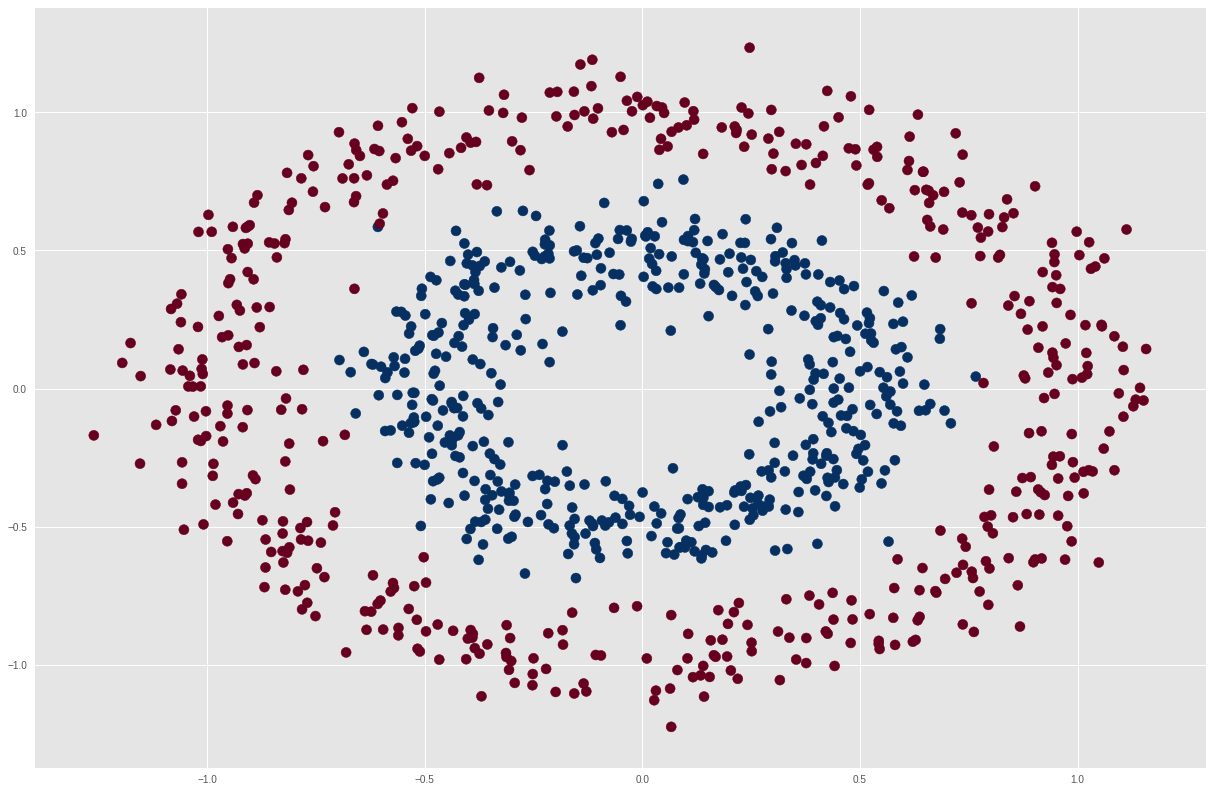

In [0]:
X, y = datasets.make_circles(1000, noise=0.1, factor=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

What do?

Introducing the **kernel**. Transform the space into something else, that turns out to be linearly separable (by a plane).

In fact, when we applied polynomial features to our data, we were applying a sort of kernel so we can more easly separate the classes. Working in a higher dimmensional space is sometimes easier. Have a look at this pretty image

![](https://i.stack.imgur.com/7yM2K.png)

We added another dimmension by applying a kernel. In this new space, the data is linearly separable by a plane, and SVM can work really good. Let's see it in action.

Further Reading:
- http://diggdata.in/post/94066544971/support-vector-machine-without-tears
- https://en.wikipedia.org/wiki/Radial_basis_function_kernel

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(<matplotlib.figure.Figure at 0x7f38db55f6a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db83fc88>)

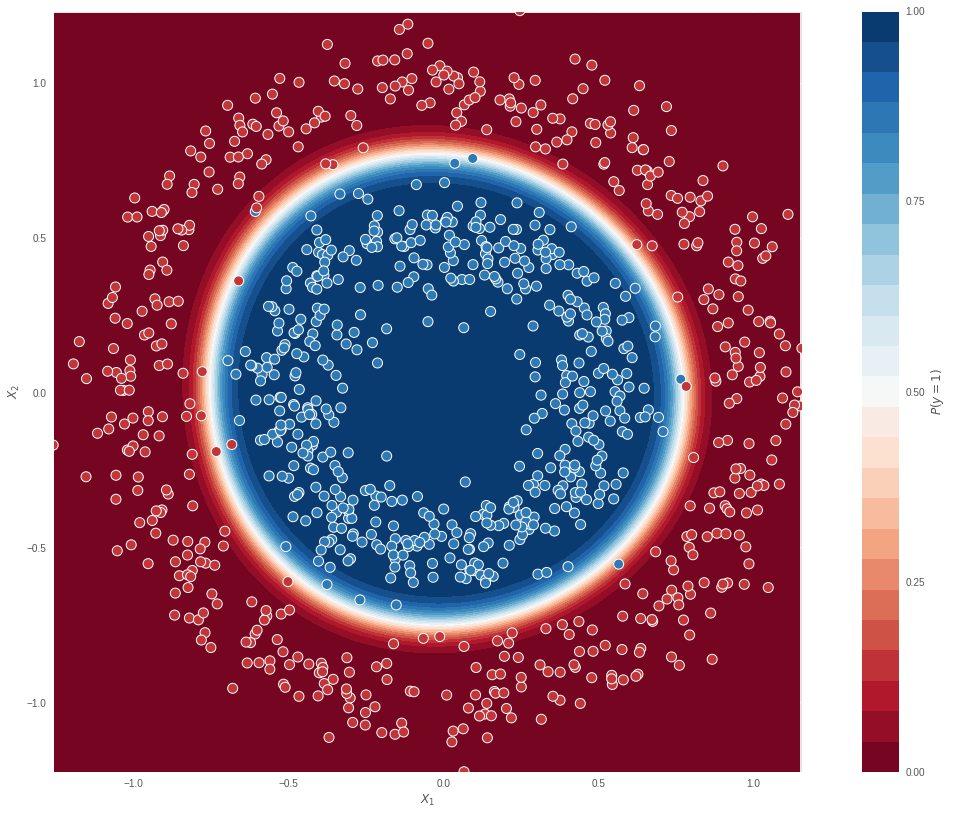

In [0]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', probability=True)
model.fit(X, y)

plot_decision_boundary(model, X, y)

## Coding challenge

Fit a SVM with and 'rbf' kernel and one 'poly' kernel on the moons dataset.

In [0]:
X, y = datasets.make_moons(1000, noise=0.2, random_state=0)

# Careful to specifiy probability=True to the SVM, or else the decision boundry plot will fail.

# TODO train a SVM with 'rbf' kernel

# TODO plot the decision boundry

# TODO train a SVM with 'poly' kernel

# TODO plot the decision boundry

(<matplotlib.figure.Figure at 0x7f38db2a6c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db0e95f8>)

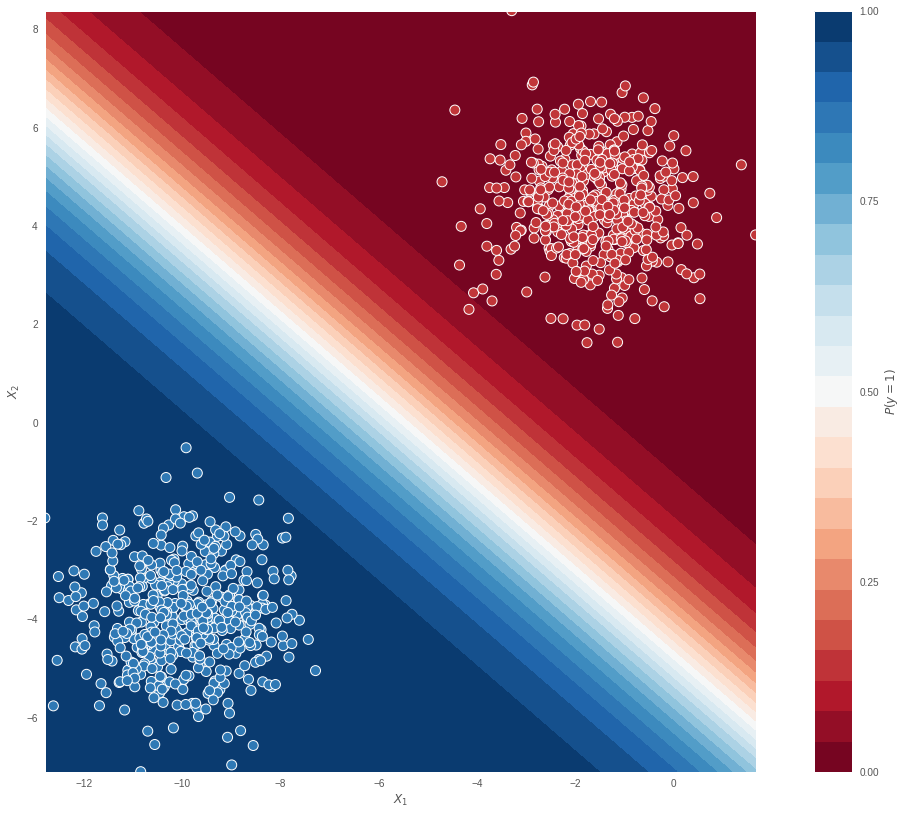

In [0]:
X, y = datasets.make_blobs(1000, centers=2, random_state=1)

# Linear SVM
model = SVC(kernel='linear', probability=True)
model.fit(X, y)

plot_decision_boundary(model, X, y)

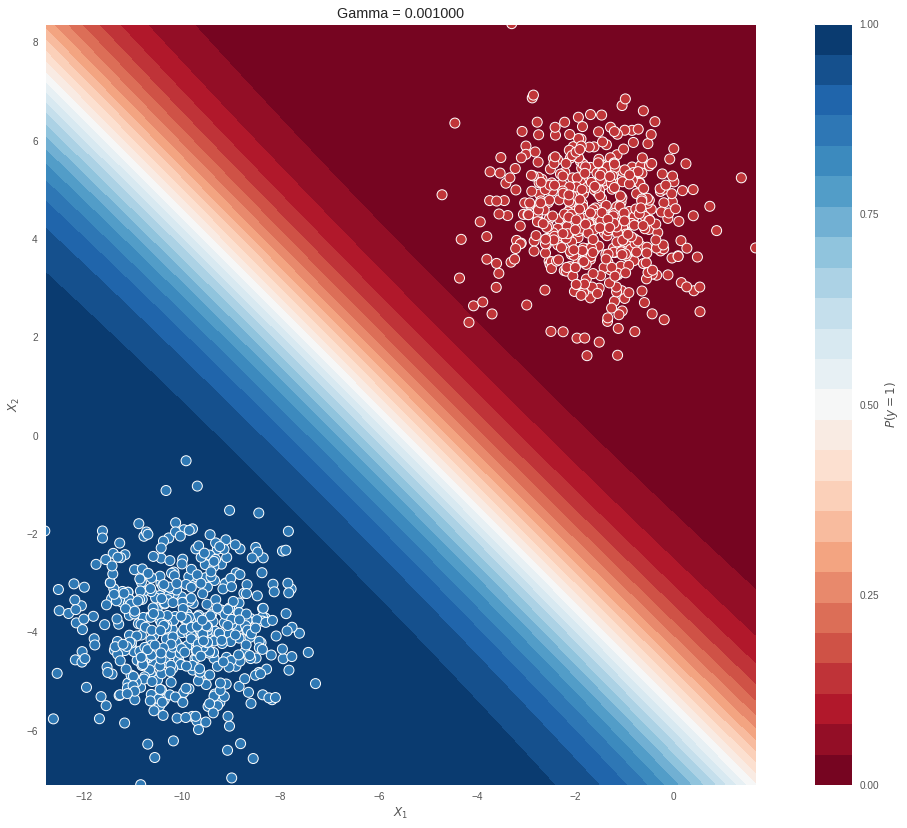

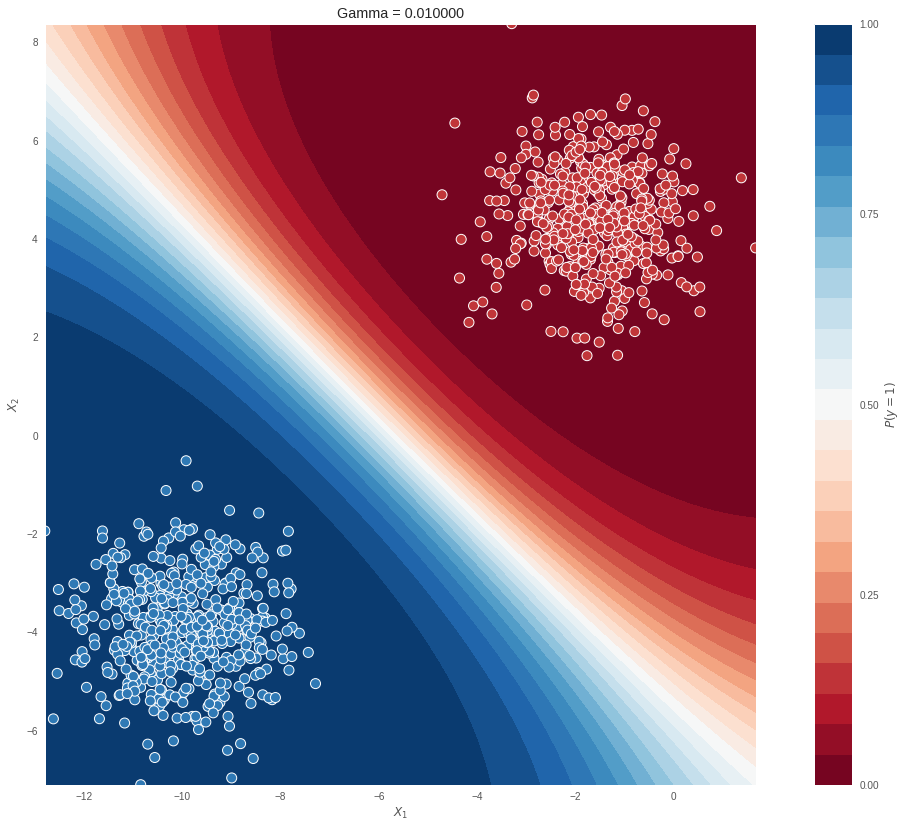

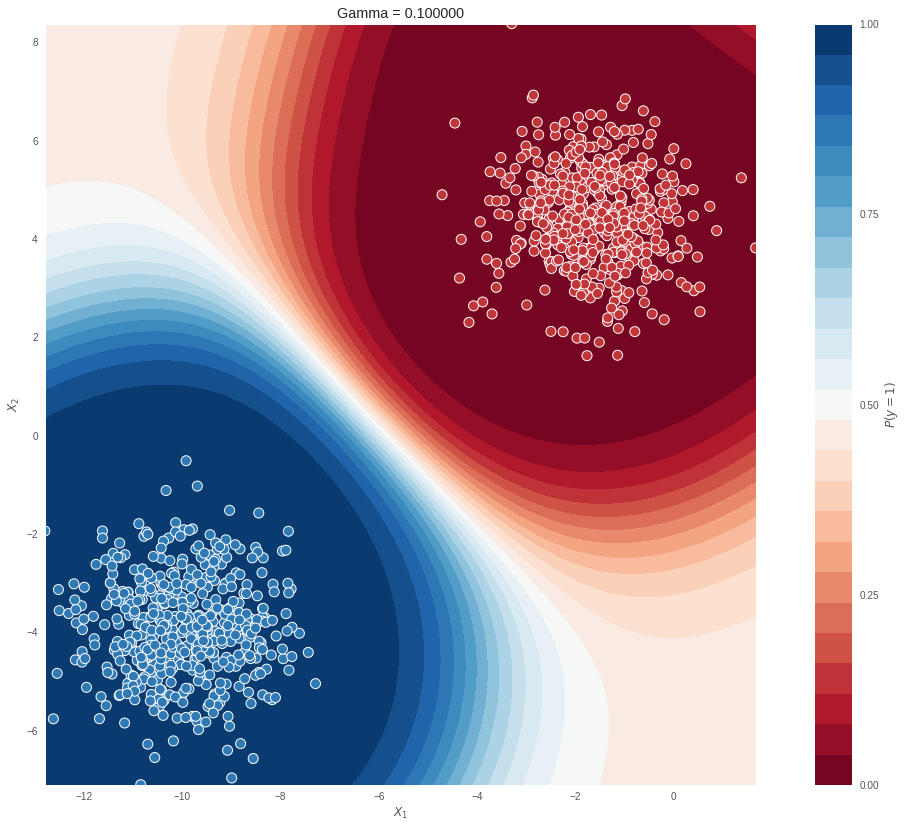

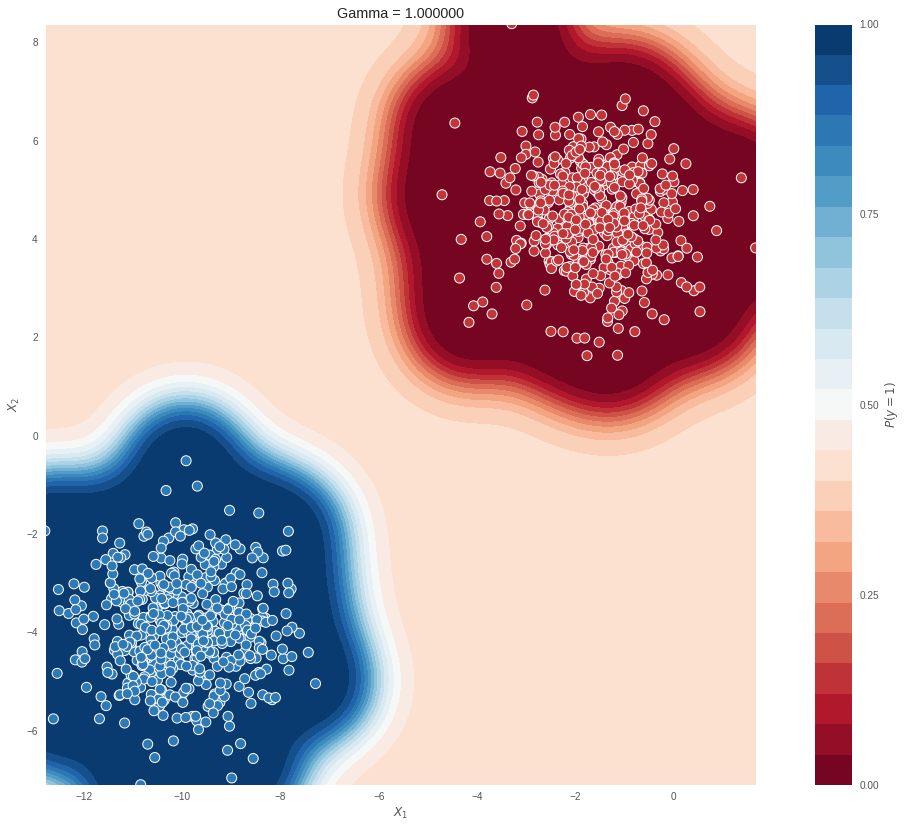

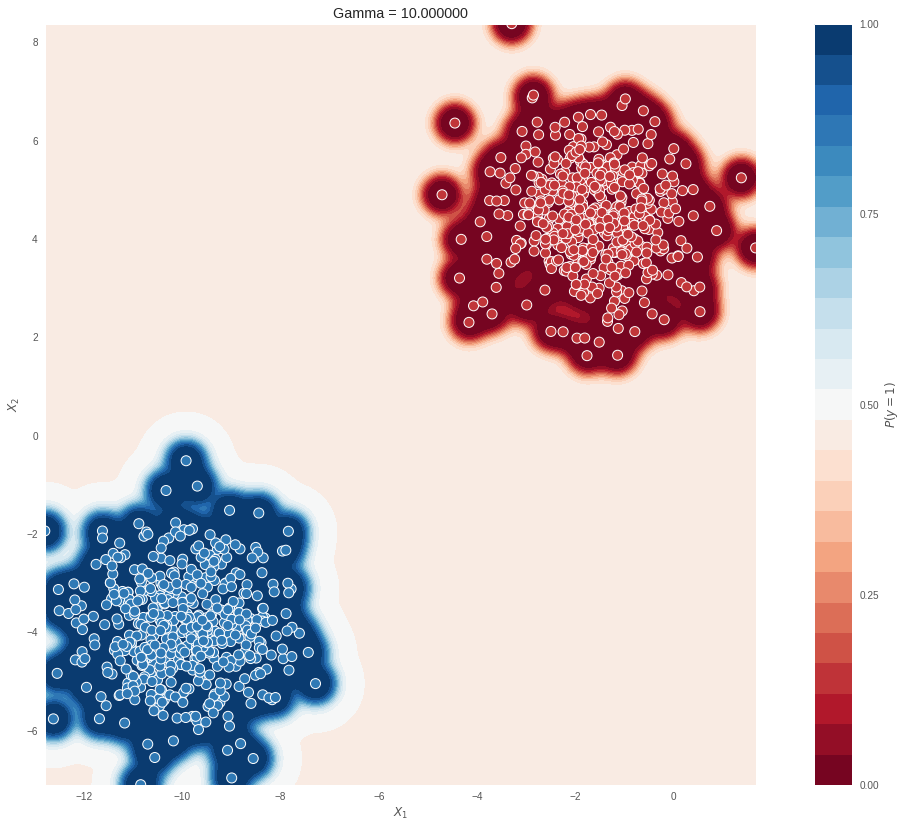

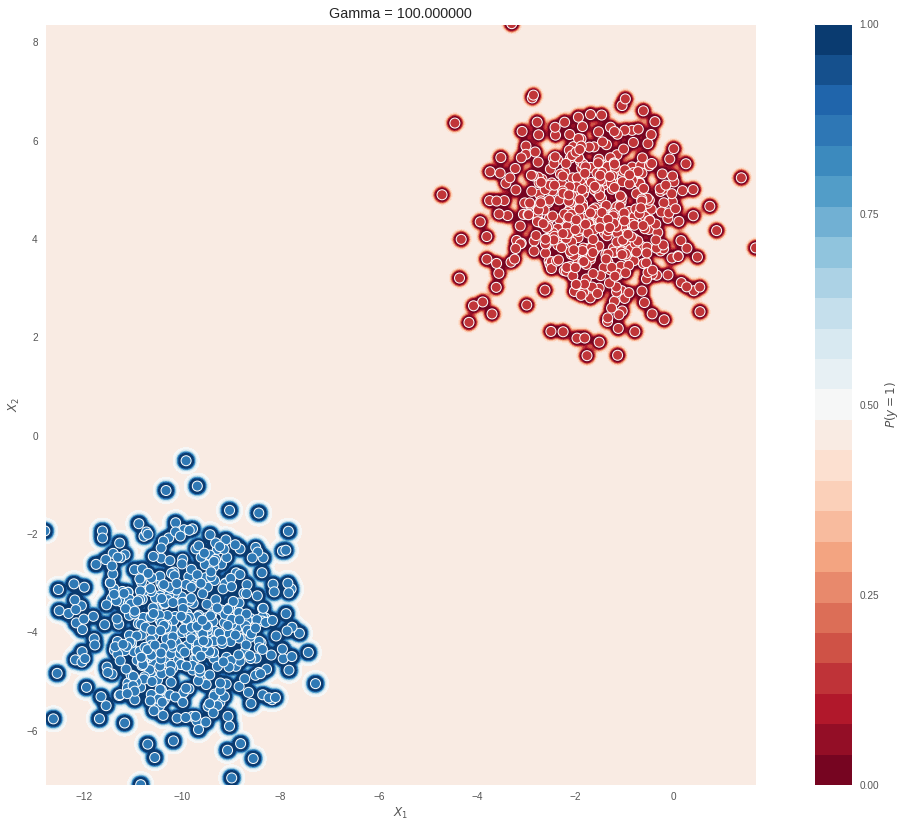

In [0]:
X, y = datasets.make_blobs(1000, centers=2, random_state=1)

# SVM with RBF kernel, multiple values for gamma

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  
  model = SVC(kernel='rbf', probability=True, gamma=gamma)
  model.fit(X, y)
  
#   print("Gamma = ", gamma)
  plot_decision_boundary(model, X, y)
  plt.title("Gamma = %f" % gamma)
  plt.show()

# Imbalanced Learning

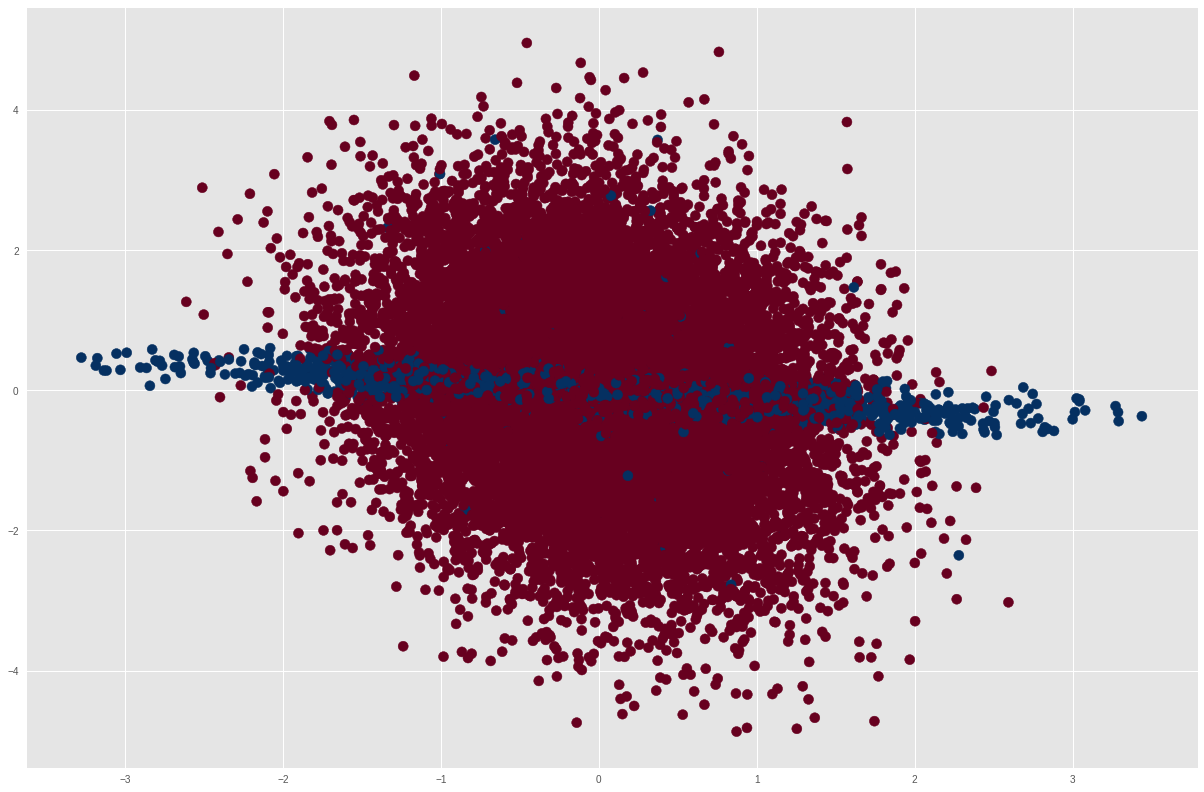

In [0]:

# This is an imbalanced dataset. Be wary of accuracy!
X, y = datasets.make_classification(n_samples=20000, 
                           n_features=2, 
                           n_informative=2,
                           n_classes=2, 
                           n_clusters_per_class=1,
                           n_redundant=0,
                           weights=[0.90, 0.10],
                           class_sep=0.0,
                           random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.gcf().set_size_inches(21, 14)

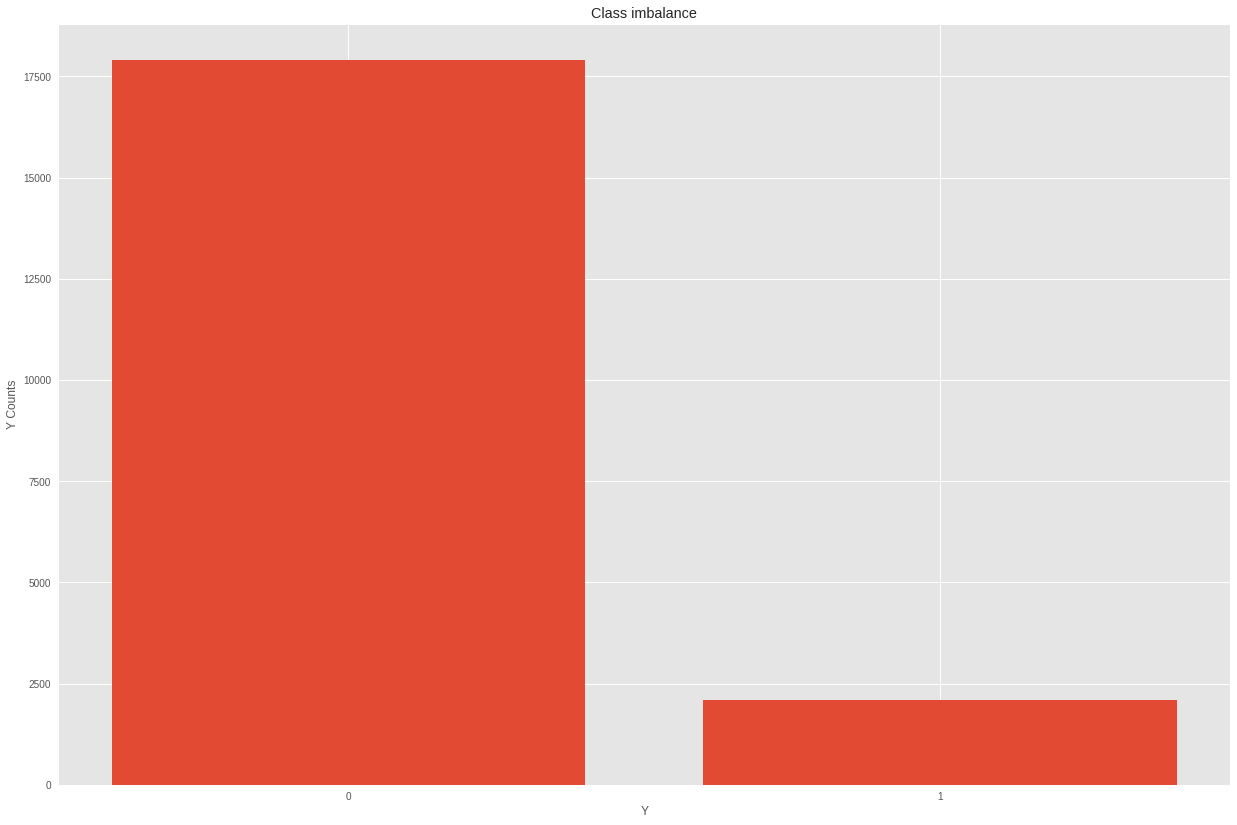

In [0]:
plt.bar(np.arange(2), np.unique(y, return_counts=True)[1])
plt.xticks(np.arange(2), ('0', '1'))
plt.xlabel('Y')
plt.ylabel('Y Counts')
plt.gcf().set_size_inches(21, 14)
plt.title('Class imbalance')
plt.show()

## Coding Challenge

Train LogisticRegression on this dataset. Check the train or test accuracy. 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(<matplotlib.figure.Figure at 0x7f38db048710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38db04aa20>)

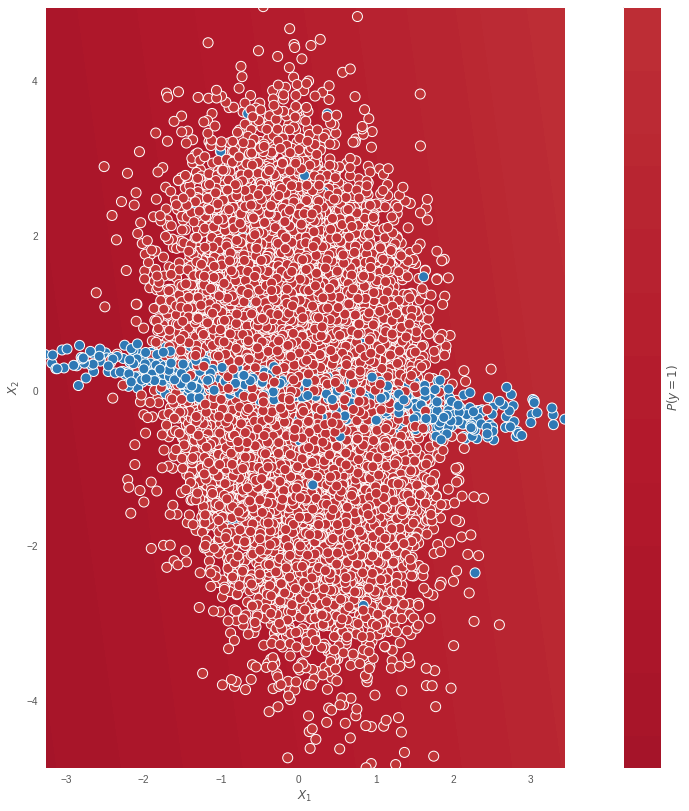

In [0]:
# TODO do it.
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression()
model.fit(x_train, y_train)

plot_decision_boundary(model, X, y)

Impressive, but it the model actually hasn't learned anything.

## Other Classification Metrics


![](https://cdn-images-1.medium.com/max/1600/1*CPnO_bcdbE8FXTejQiV2dg.png)

Precision measures how many selected items are relevant.

$Precision=\frac{TP}{TP + FP}$

Recall measures how many relevant items are selected.

$Recall=\frac{TP}{TP + FN}$

F1 score is just the harmonic mean between the two, so that we can a have a single measure of our performance.


$F_1=\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

Further Reading:
- https://en.wikipedia.org/wiki/Precision_and_recall

## Coding Challenge

Check the confusion matrix of your trained model and the precision and recall.

In [0]:
from sklearn.metrics import classification_report

# TODO call classification report

print(classification_report(model.predict(x_test), y_test))

# The model dosen't predict any correct values for class 1.


              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5000
           1       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.50      0.45      0.47      5000
weighted avg       1.00      0.90      0.95      5000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
!pip install imbalanced-learn

### Over-Sampling and Down-Sampling

To deal with imbalanced datasets, one strategy is to over-sample the minority class, or to downsample the majority class. For now, we will use 

[**Synthetic minority over-sampling technique**](https://arxiv.org/pdf/1106.1813.pdf)

We'll use [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/api.html) python package.

Check out this article on how to properly apply SMOTE:

[The Right Way to Oversample in Predictive Modeling](https://beckernick.github.io/oversampling-modeling/)

The gist of it is that you should first split your data into train and test and **then** apply SMOTE. Otherwise, if you first over-sample and then split, some of the oversampled data will be present in the test set and then the evaluation will be incorrect!

## Coding Challenge for True Heroes

Use "Synthetic minority over-sampling" to over sample your data and train your model.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precision 0.5392156862745098
Recall 0.11215334420880914
F1 0.18568534773801484


(<matplotlib.figure.Figure at 0x7f38d8f7ba20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38d9122a90>)

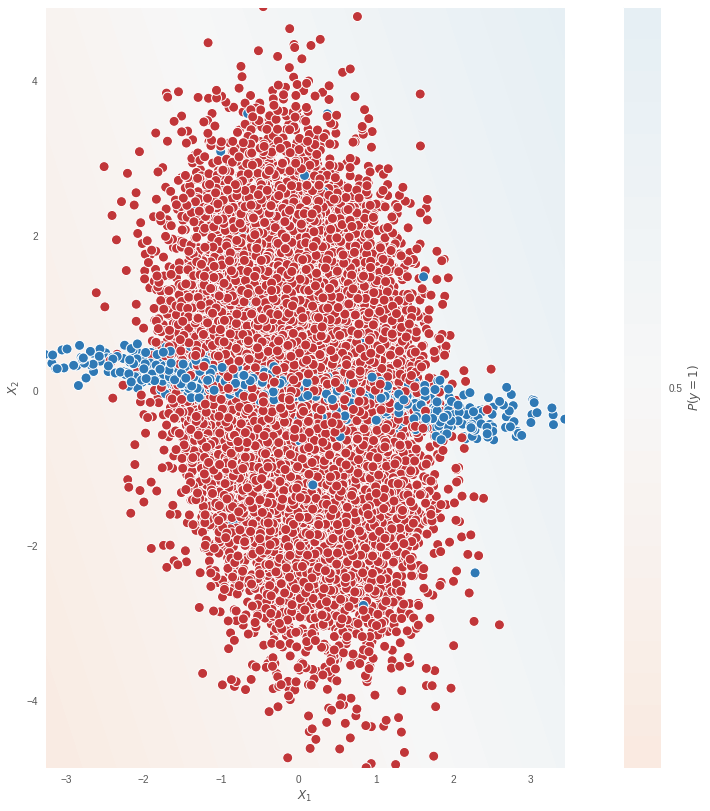

In [0]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
import imblearn.over_sampling as over_sampling

smote = over_sampling.SMOTE(ratio=1.0)

# TODO 1: Split your data into train and test (using train_test_split).
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)


# TODO 2: Use SMOTE to oversample the *training data*.

x_res, y_res = smote.fit_sample(x_train, y_train)

# TODO 3: Train a model on the oversampled data.

model = LogisticRegression() # could be any model
model.fit(x_res, y_res)

# TODO 4: Evaluate the model on the test set with the proper metrics.

print("Precision", precision_score(model.predict(x_test), y_test))
print("Recall", recall_score(model.predict(x_test), y_test))
print("F1", f1_score(model.predict(x_test), y_test))

# Still pretty bad, but at least it gets some values


plot_decision_boundary(model, X, y)

# Thanks for your attention!